# Regression on Decison Trees and Random Forest

In [1]:
#importing important libraries

#libraries for reading dataset
import numpy as np
import pandas as pd

#libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for model building and understanding
import sklearn
from sklearn.model_selection import train_test_split

#importing label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#importing libraries for decision tree regression
from IPython.display import Image  
from six import StringIO
import graphviz, pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_log_error

#importing libraries for boosting
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#libraries for hyper parameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


#library to deal with warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to display all the columns in the dataset
pd.set_option('display.max_columns', 500)

## Reading  Data

In [3]:
cp = pd.read_csv('carprice.csv')

### Understanding the data

In [4]:
cp.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cp.shape

(205, 26)

In [6]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
cp.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#symboling is a categorical data so we convert to the specified type

cp['symboling'] = cp['symboling'].apply(str)

#### There are 11 categorical data and remaining are the numerical data

In [9]:
#as per the bussiness requirements we only need name of the carcompany and not the carmodel
#so we drop carmodel and only keep carCompany

cp['CarName'] = cp['CarName'].str.lower()
cp['carCompany'] = cp['CarName'].str.split(' ').str[0]
cp = cp.drop('CarName',axis = 1)

In [10]:
cp.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Data visualization and understanding using EDA

### Price is a dependent variable

#### Visualising numerical data

In [11]:
#Finding correlation
cor = cp.corr()
cor

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
wheelbase,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.150276,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


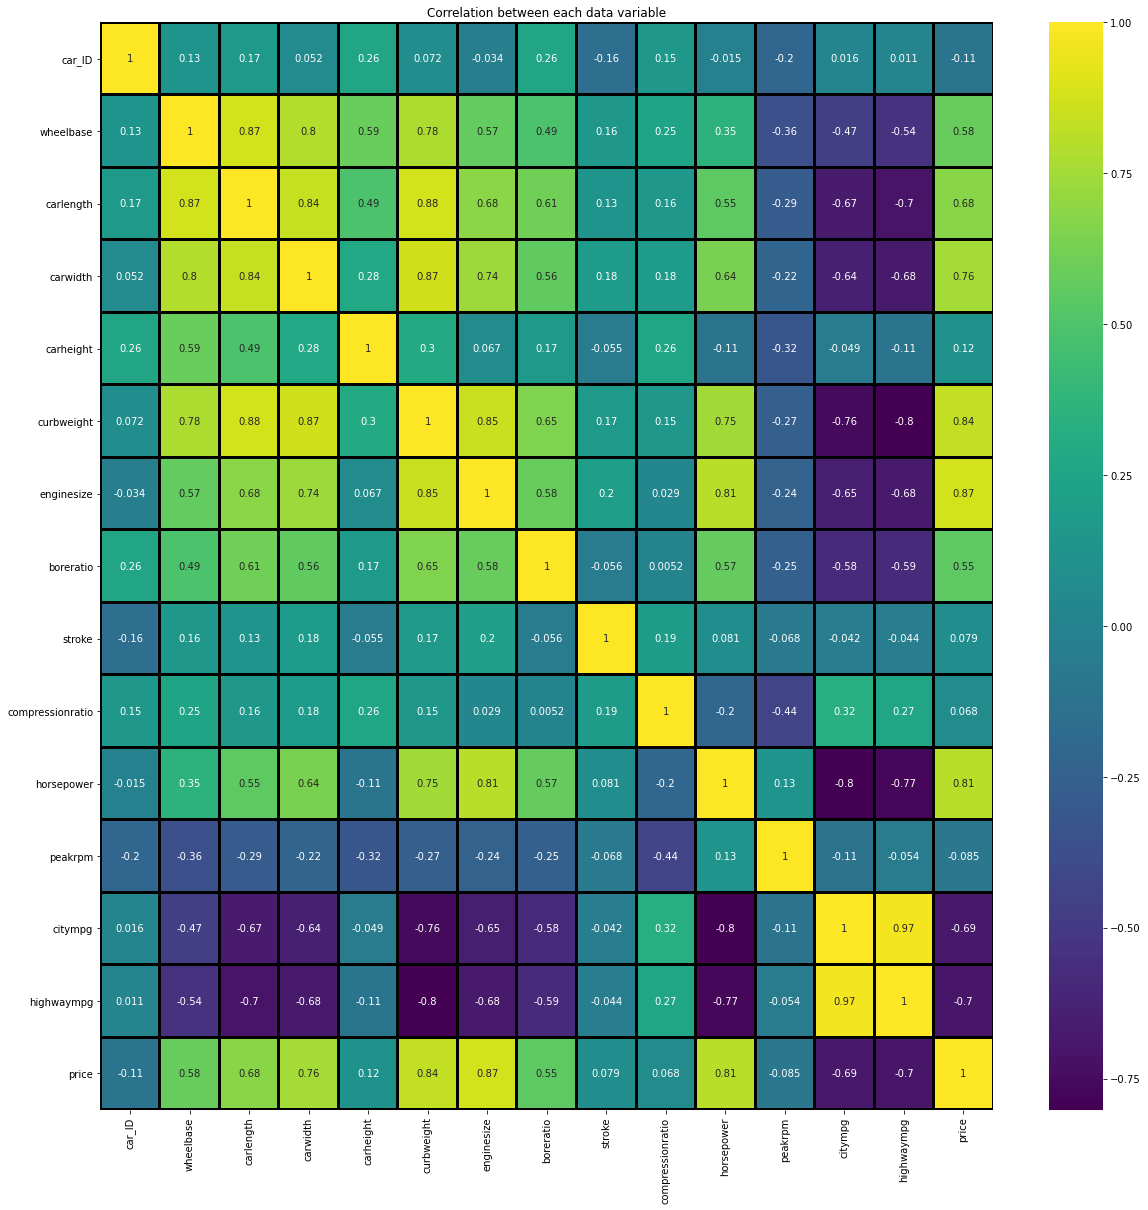

In [12]:
# visulaising correlation using heatmap
plt.subplots(figsize=(20, 20))
plt.title('Correlation between each data variable')
sns.heatmap(cor, xticklabels=cor.columns.values,
            yticklabels=cor.columns.values,annot= True,linecolor="black",linewidths=2, cmap="viridis")
plt.show()

`citympg` and `highwaympg` have negative correlation with price

`carlength`,`carwidth`,`curbweight`,`enginesize` and `horsepower` have positve correlation with price

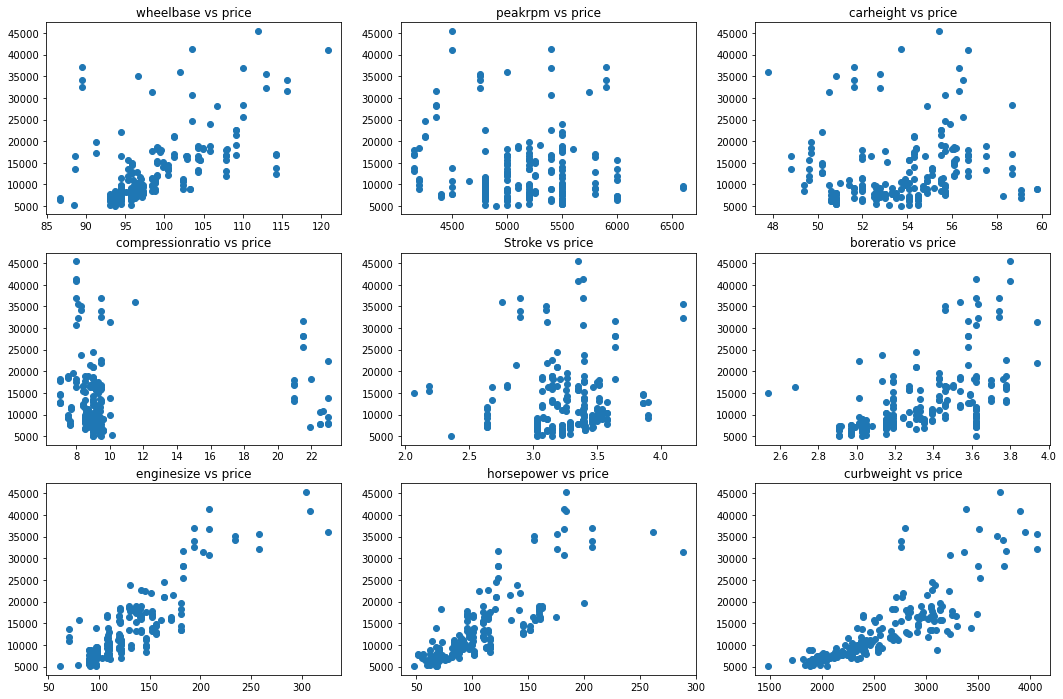

In [13]:
#scatter plot for numerical data with yaxis fixed as price

plt.figure(figsize=[18,12])

plt.subplot(3,3,1)
plt.scatter(cp.wheelbase, cp.price)
plt.title('wheelbase vs price')
plt.subplot(3,3,2)
plt.scatter(cp.peakrpm, cp.price)
plt.title('peakrpm vs price')
plt.subplot(3,3,3)
plt.scatter(cp.carheight, cp.price)
plt.title('carheight vs price')

plt.subplot(3,3,4)
plt.scatter(cp.compressionratio, cp.price)
plt.title('compressionratio vs price')
plt.subplot(3,3,5)
plt.scatter(cp.stroke, cp.price)
plt.title('Stroke vs price')
plt.subplot(3,3,6)
plt.scatter(cp.boreratio, cp.price)
plt.title('boreratio vs price')

plt.subplot(3,3,7)
plt.scatter(cp.enginesize, cp.price)
plt.title('enginesize vs price')
plt.subplot(3,3,8)
plt.scatter(cp.horsepower, cp.price)
plt.title('horsepower vs price')
plt.subplot(3,3,9)
plt.scatter(cp.curbweight, cp.price)
plt.title('curbweight vs price')
plt.show()

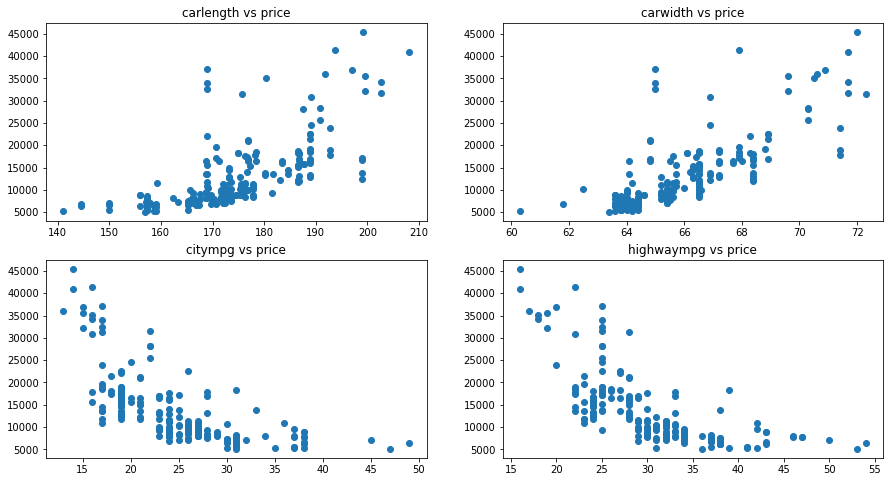

In [14]:
plt.figure(figsize=[15,8])

plt.subplot(2,2,1)
plt.scatter(cp.carlength, cp.price)
plt.title('carlength vs price')
plt.subplot(2,2,2)
plt.scatter(cp.carwidth, cp.price)
plt.title('carwidth vs price')
plt.subplot(2,2,3)

plt.scatter(cp.citympg, cp.price)
plt.title('citympg vs price')
plt.subplot(2,2,4)
plt.scatter(cp.highwaympg, cp.price)
plt.title('highwaympg vs price')

plt.show()

In [15]:
print(np.corrcoef(cp['carlength'], cp['carwidth'])[0, 1])
print(np.corrcoef(cp['citympg'], cp['highwaympg'])[0, 1])

0.841118268481846
0.9713370423425061


#### Visualising categorical data

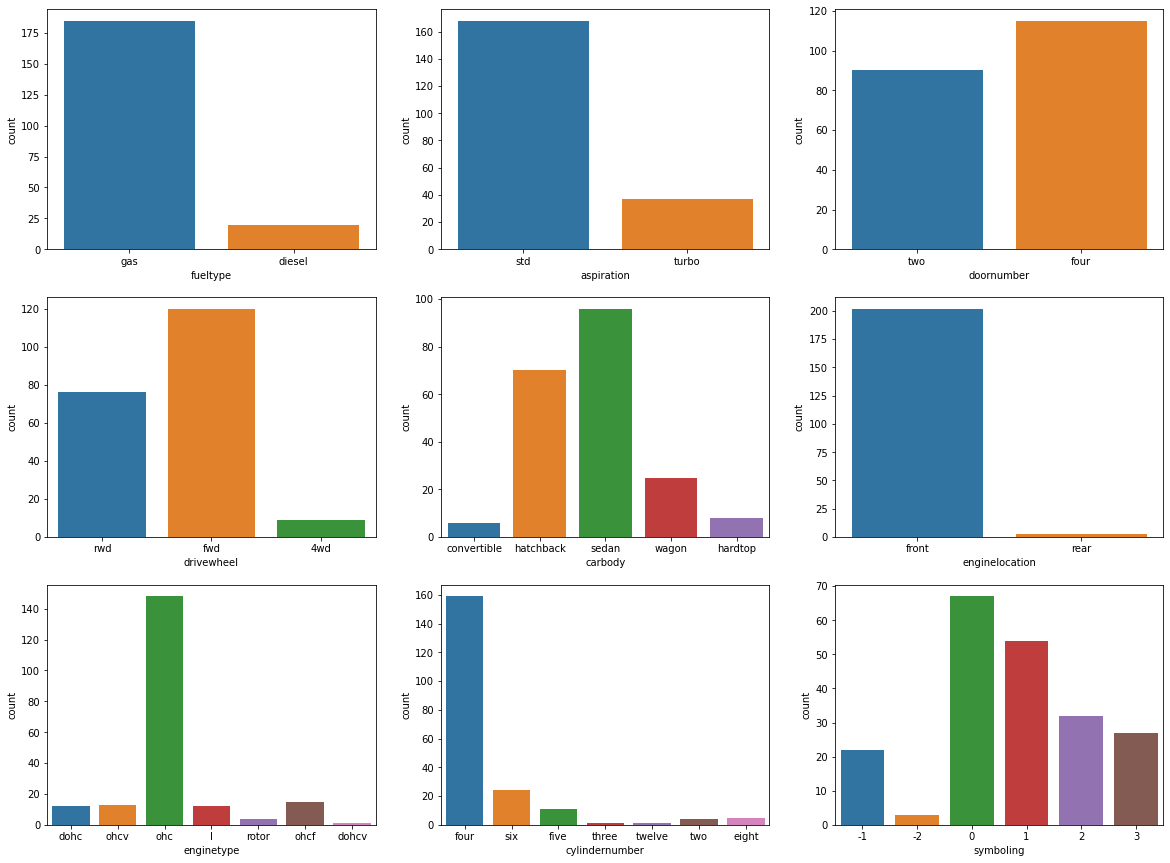

In [16]:
plt.figure(figsize=(20, 15))

plt.subplot(3,3,1)
sns.countplot(cp.fueltype)

plt.subplot(3,3,2)
sns.countplot(cp.aspiration)

plt.subplot(3,3,3)
sns.countplot(cp.doornumber)

plt.subplot(3,3,4)
sns.countplot(cp.drivewheel)

plt.subplot(3,3,5)
sns.countplot(cp.carbody)

plt.subplot(3,3,6)
sns.countplot(cp.enginelocation)

plt.subplot(3,3,7)
sns.countplot(cp.enginetype)

plt.subplot(3,3,8)
sns.countplot(cp.cylindernumber)

plt.subplot(3,3,9)
sns.countplot(cp.symboling)

plt.show()


`ohc` is the most preferred enginetype

most cars have `four cylinders`

`sedan` and `hatchback` are most common carbody

most cars prefer `gas` fueltype

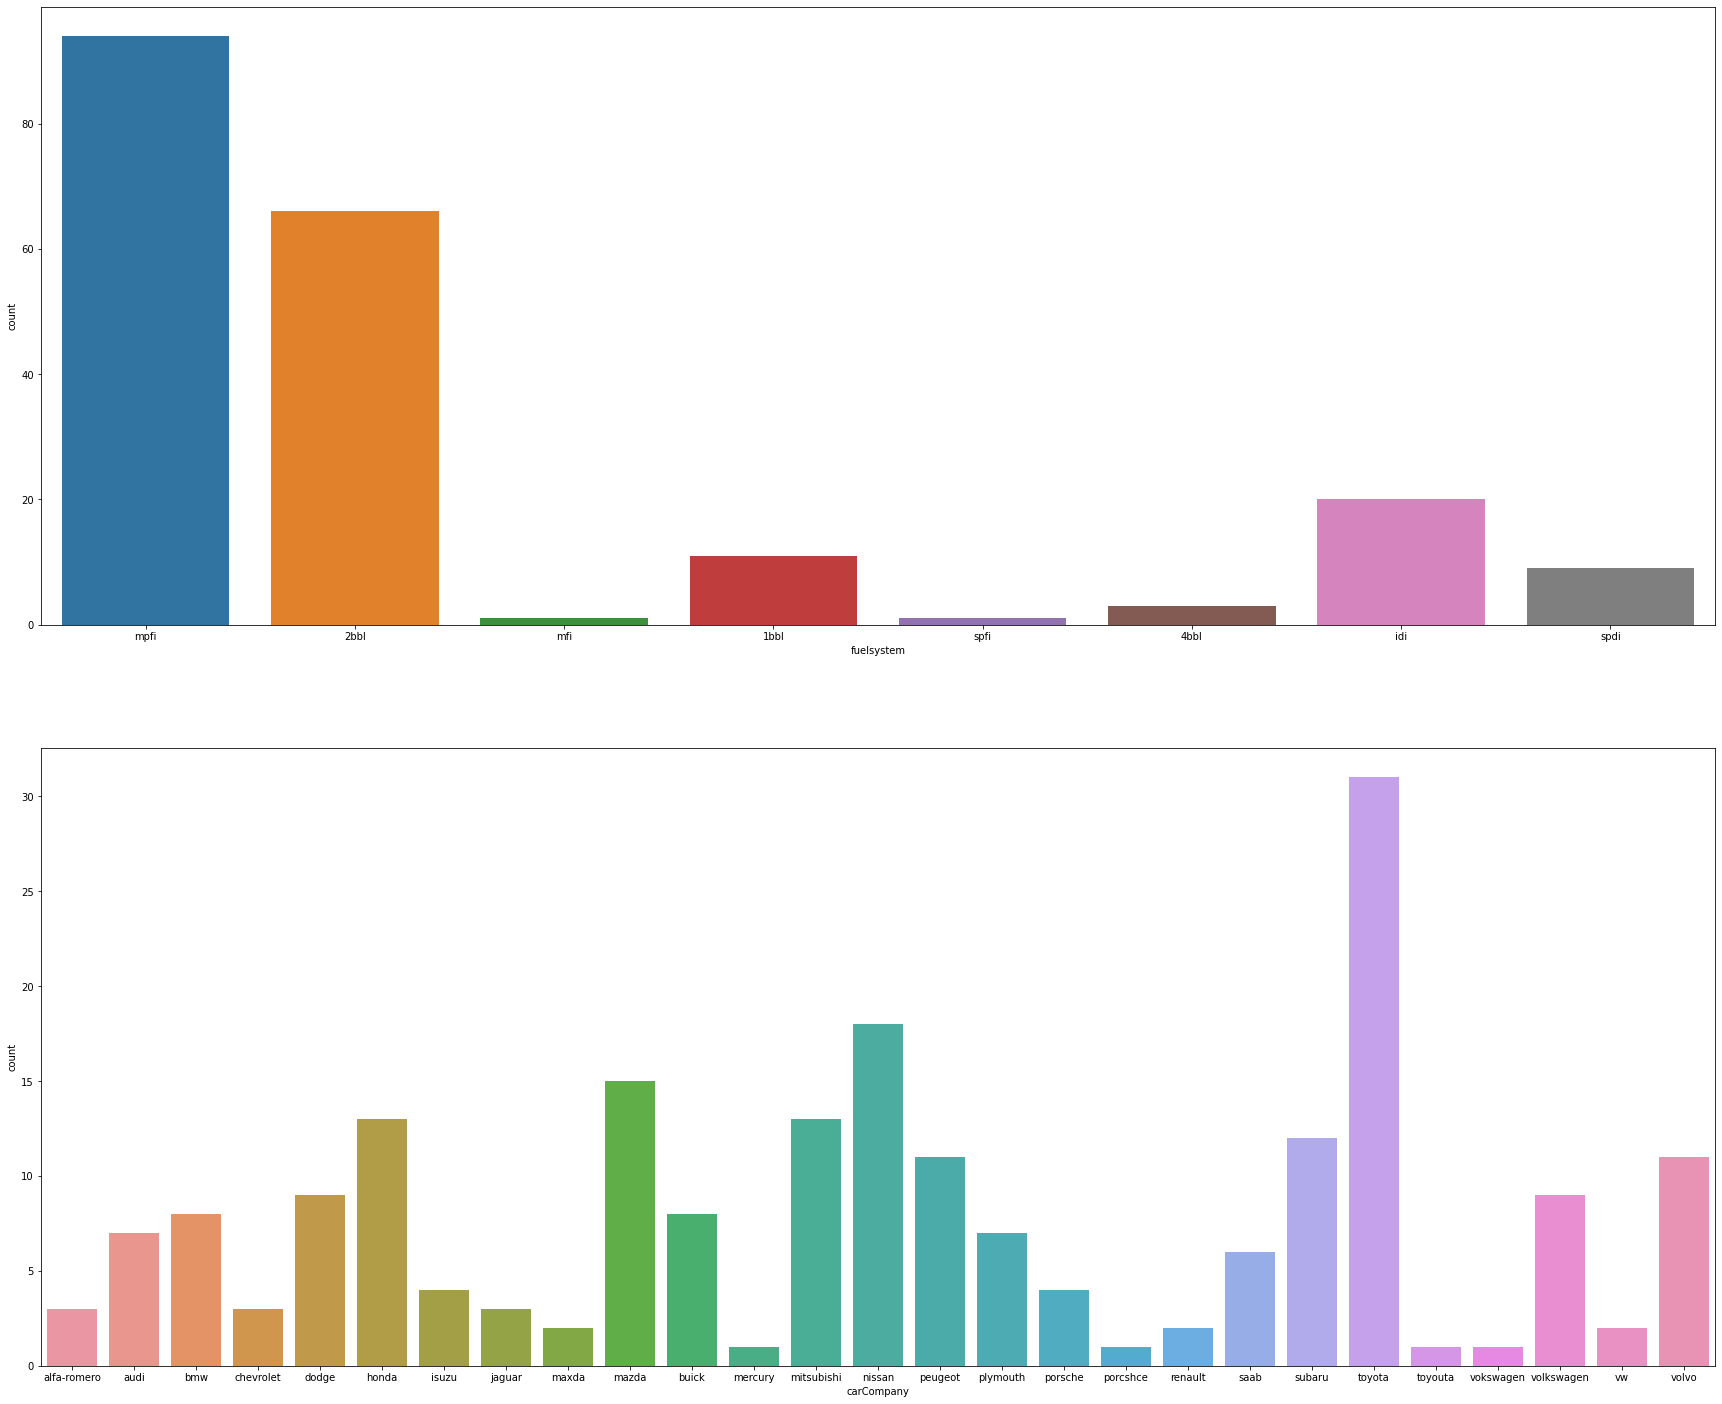

In [17]:
plt.figure(figsize=(30,25))

plt.subplot(2,1,1)
sns.countplot(cp.fuelsystem)

plt.subplot(2,1,2)
sns.countplot(cp.carCompany)

plt.show()

`mpfi` and `2bbl` are most common fuelsystem

`Toyota` is most favoured carcompany

##### we can observe that numerous carcompanies are misspelled

In [18]:
# replcaing incorrect carcompanies with correct ones so we replace them with correct spellings

cp['carCompany'] = cp['carCompany'].str.replace('vok','volk')
cp['carCompany'] = cp['carCompany'].str.replace('ou','o')
cp['carCompany'] = cp['carCompany'].str.replace('cshce','sche')
cp['carCompany'] = cp['carCompany'].str.replace('vw','volkswagen')
cp['carCompany'] = cp['carCompany'].str.replace('xd','zd')

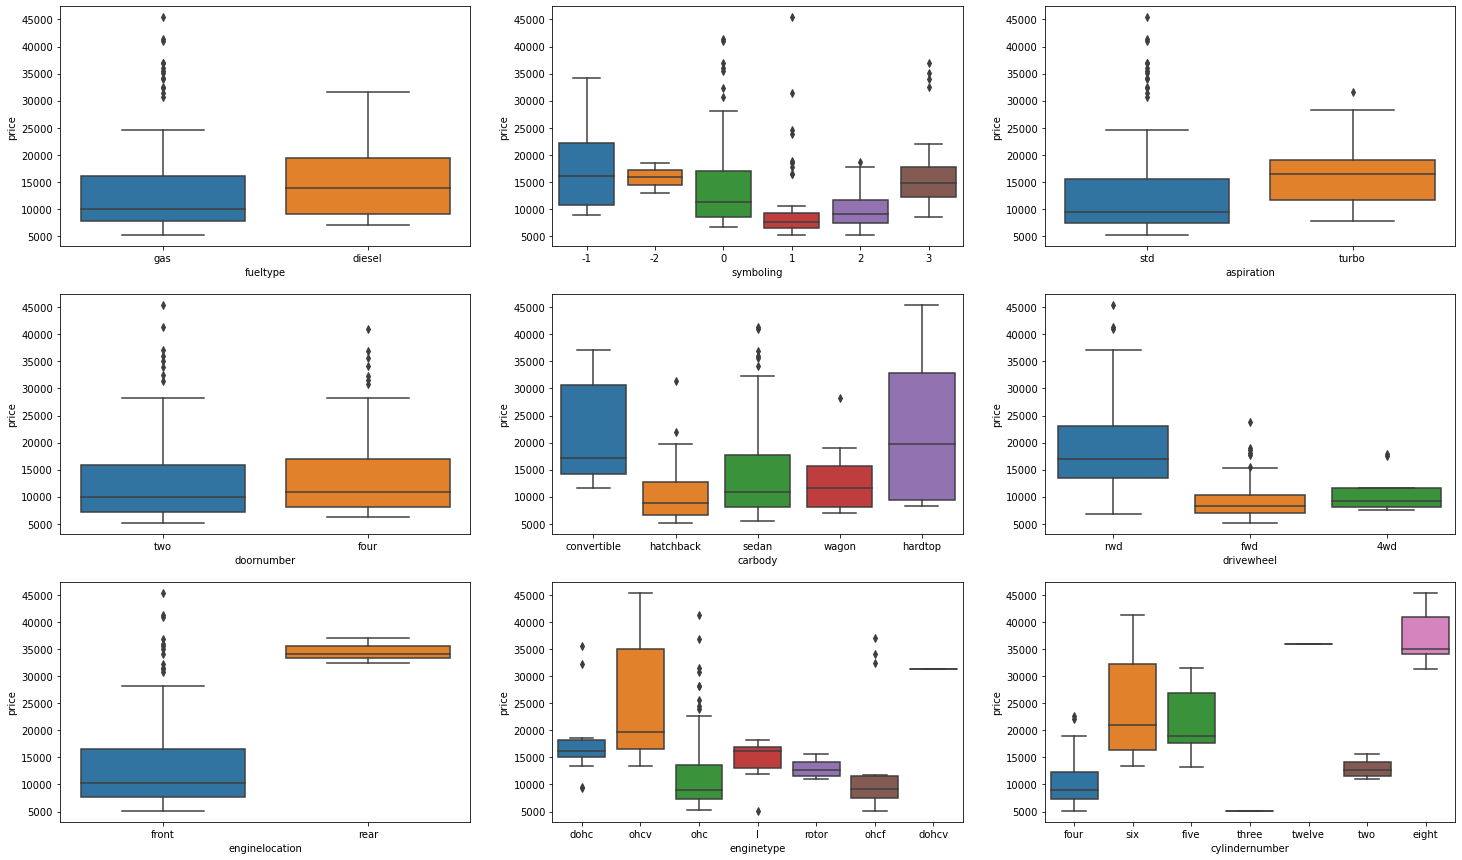

In [19]:
# visualising categorical data vs price

plt.figure(figsize = (25,15))

plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype',y='price', data = cp)

plt.subplot(3,3,2)
sns.boxplot(x = 'symboling',y='price', data = cp)

plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration',y='price', data = cp)

plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber',y='price', data = cp)

plt.subplot(3,3,5)
sns.boxplot(x = 'carbody',y='price', data = cp)

plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel',y='price', data = cp)

plt.subplot(3,3,7)
sns.boxplot(x = 'enginelocation',y='price', data = cp)

plt.subplot(3,3,8)
sns.boxplot(x = 'enginetype',y='price', data = cp)

plt.subplot(3,3,9)
sns.boxplot(x = 'cylindernumber',y='price', data = cp)

plt.show()

`ohcv` are most expensive of the enginetype

`doornumber` don't have much impact on the price

`hardtop` and `covertible` are most expensive among the carbody

cars that are `rwd` have higher price

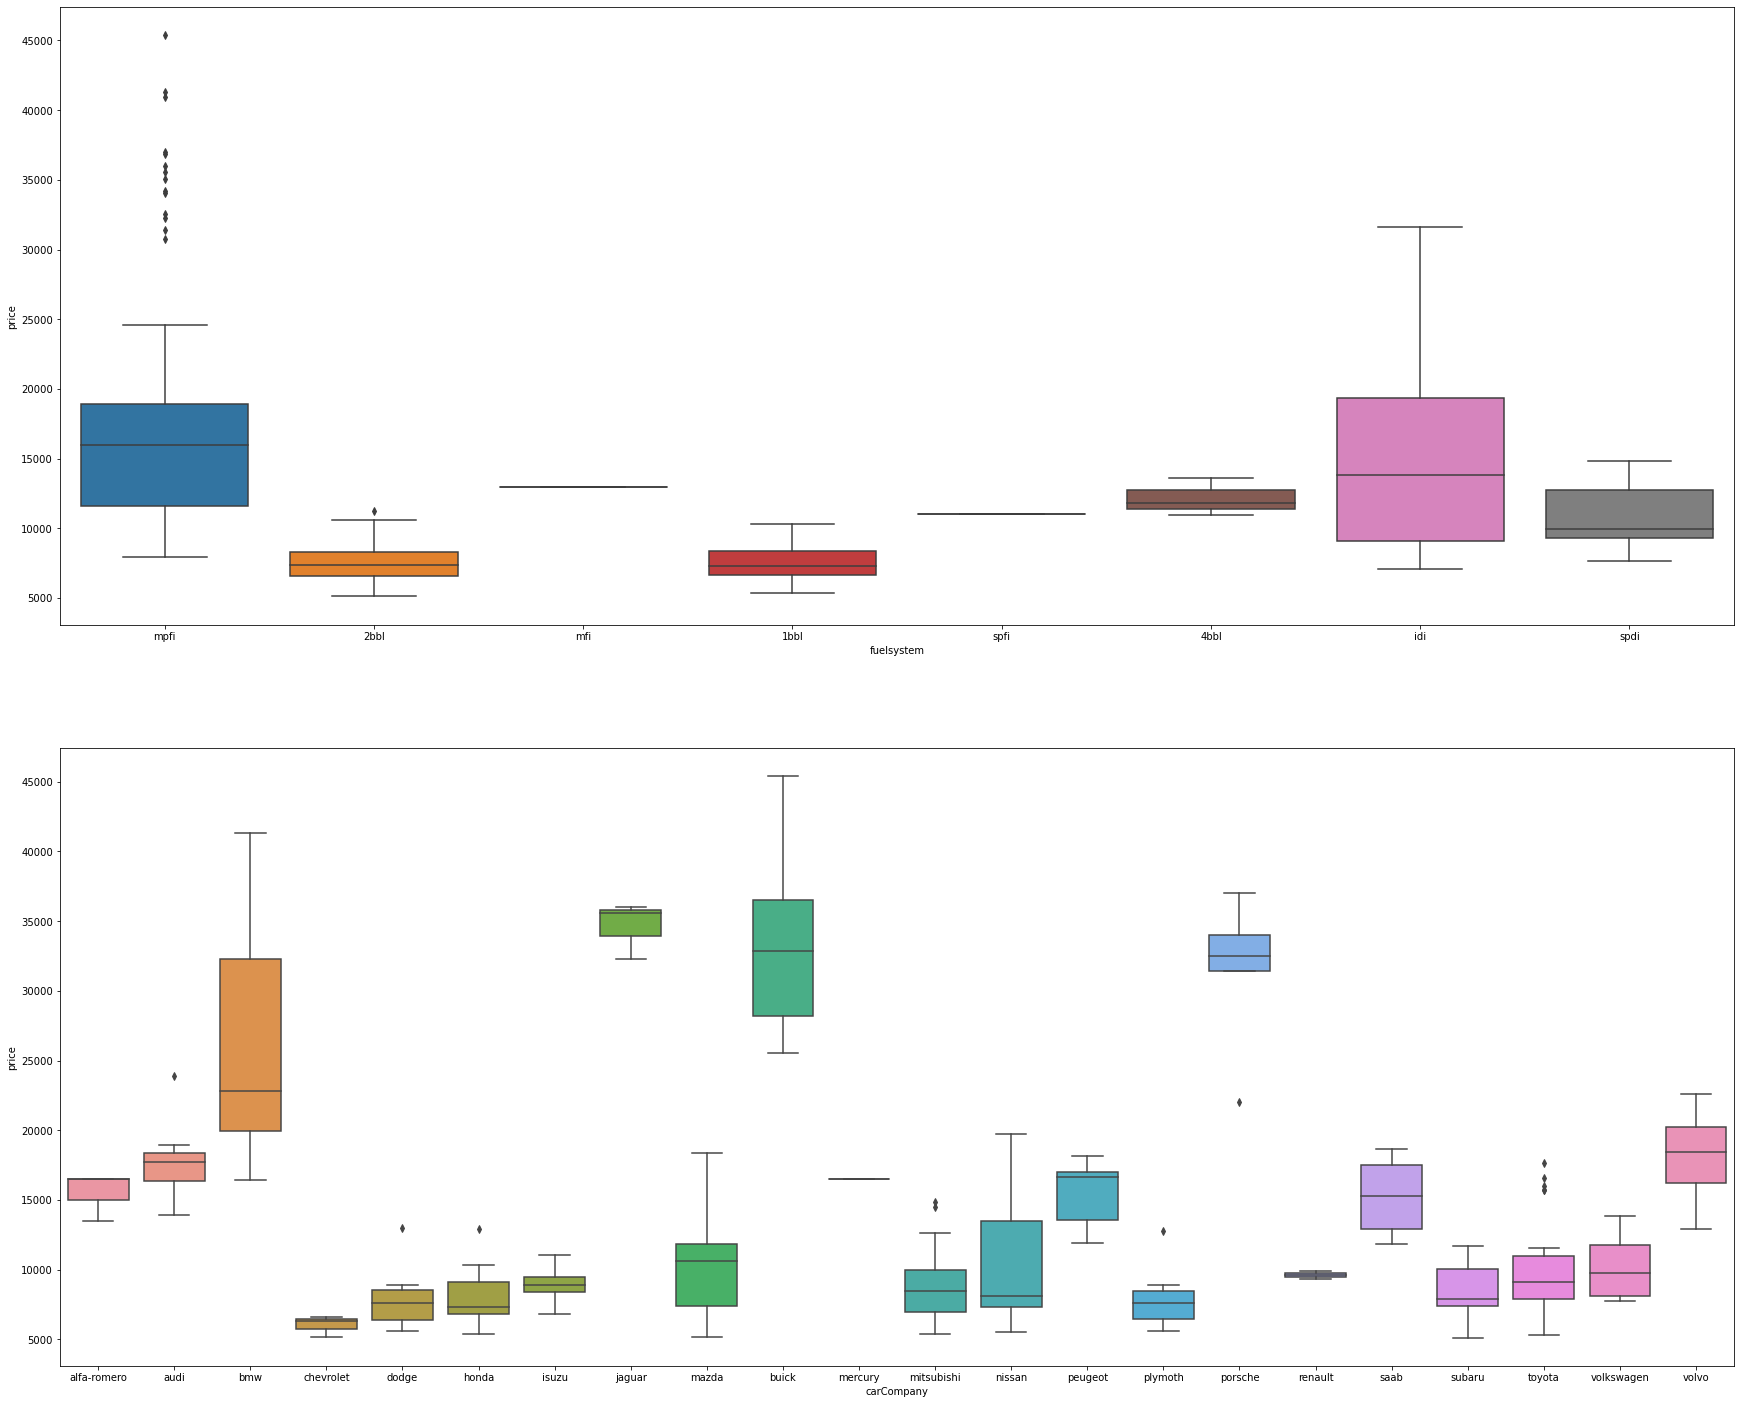

In [20]:
plt.figure(figsize=(30,25))

plt.subplot(2,1,1)
sns.boxplot(x = 'fuelsystem',y='price', data = cp)

plt.subplot(2,1,2)
sns.boxplot(x = 'carCompany',y='price', data = cp)

plt.show()

`buick`, `jaguar`, `porsche` and `bmw` are most expensive carCompany

`mpfi` and `idi` having the highest price range. 


### Encoding categorical data

In [21]:
#defining fucntion for binary encoding of features with only 2 types of data
def number_map(x):
    return x.map({'gas':1,'diesel':0,'std':0,'turbo':1,'two':0,'four':1,'front':0,'rear':1})

cp[['aspiration']] =cp[['aspiration']].apply(number_map)
cp[['doornumber']] =cp[['doornumber']].apply(number_map)
cp[['fueltype']] =cp[['fueltype']].apply(number_map)
cp[['enginelocation']] =cp[['enginelocation']].apply(number_map)

In [22]:
#applying label encoder on categorical variables
cp['carCompany'] = le.fit_transform(cp['carCompany'])
cp['symboling'] = le.fit_transform(cp['symboling'])
cp['carbody'] = le.fit_transform(cp['carbody'])
cp['drivewheel'] = le.fit_transform(cp['drivewheel'])
cp['enginetype'] = le.fit_transform(cp['enginetype'])
cp['cylindernumber'] = le.fit_transform(cp['cylindernumber'])
cp['fuelsystem'] = le.fit_transform(cp['fuelsystem'])



In [23]:
#and dropping columns that are not required for the analysis

cp = cp.drop(['car_ID'],axis = 1)

In [24]:
# converting price to thousands i.e 12.1K 
cp['price']=cp['price'].apply(lambda val: round(val/1000,3))
pd.options.display.float_format = '{:,.2f}'.format


In [25]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int32  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

In [26]:
cp.head(100)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,5,1,0,0,0,2,0,88.60,168.80,64.10,48.80,2548,0,2,130,5,3.47,2.68,9.00,111,5000,21,27,13.49,0
1,5,1,0,0,0,2,0,88.60,168.80,64.10,48.80,2548,0,2,130,5,3.47,2.68,9.00,111,5000,21,27,16.50,0
2,3,1,0,0,2,2,0,94.50,171.20,65.50,52.40,2823,5,3,152,5,2.68,3.47,9.00,154,5000,19,26,16.50,0
3,4,1,0,1,3,1,0,99.80,176.60,66.20,54.30,2337,3,2,109,5,3.19,3.40,10.00,102,5500,24,30,13.95,1
4,4,1,0,1,3,0,0,99.40,176.60,66.40,54.30,2824,3,1,136,5,3.19,3.40,8.00,115,5500,18,22,17.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,1,0,0,2,1,0,94.50,165.60,63.80,53.30,2028,3,2,97,1,3.15,3.29,9.40,69,5200,31,37,7.80,12
96,3,1,0,1,3,1,0,94.50,165.30,63.80,54.50,1971,3,2,97,1,3.15,3.29,9.40,69,5200,31,37,7.50,12
97,3,1,0,1,4,1,0,94.50,170.20,63.80,53.50,2037,3,2,97,1,3.15,3.29,9.40,69,5200,31,37,8.00,12
98,4,1,0,0,1,1,0,95.10,162.40,63.80,53.30,2008,3,2,97,1,3.15,3.29,9.40,69,5200,31,37,8.25,12


In [27]:
X=cp.drop(["price"],axis=1)
y=cp["price"]

### Splitting data into test and train datasets

In [28]:
#splitting the data into test and train for evaluation
# taking the test data as 30% and train data as 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Gradient Boosting

In [29]:
# fitting the model on train data
model = GradientBoostingRegressor()
gbr = model.fit(X_train,y_train)


In [30]:
# predicting on test data
y_pred = gbr.predict(X_test)

In [31]:
# checking the goodness of the model
metrics.r2_score(y_test, y_pred)

0.921006797207472

### Hyper parameter tuning

In [32]:
# hyper parameter tuning for GBR
GBR = GradientBoostingRegressor()
param_dist = {"learning_rate": np.linspace(0.05, 0.15,5),"subsample": [0.3, 0.6, 0.9]}

rand = RandomizedSearchCV(GBR, param_dist, cv=5,n_iter=10, random_state=100)
rand.fit(X_train,y_train)

print(rand.best_params_)

{'subsample': 0.6, 'learning_rate': 0.075}


In [34]:
GBR = GradientBoostingRegressor(learning_rate= 0.15, subsample= 0.6)
GBR.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.15, subsample=0.6)

In [35]:
# predicting on test data
y_pred = GBR.predict(X_test)

In [36]:
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.14058484145172706

In [37]:
# checking the goodness of the model
metrics.r2_score(y_test, y_pred)

0.9247683899548513

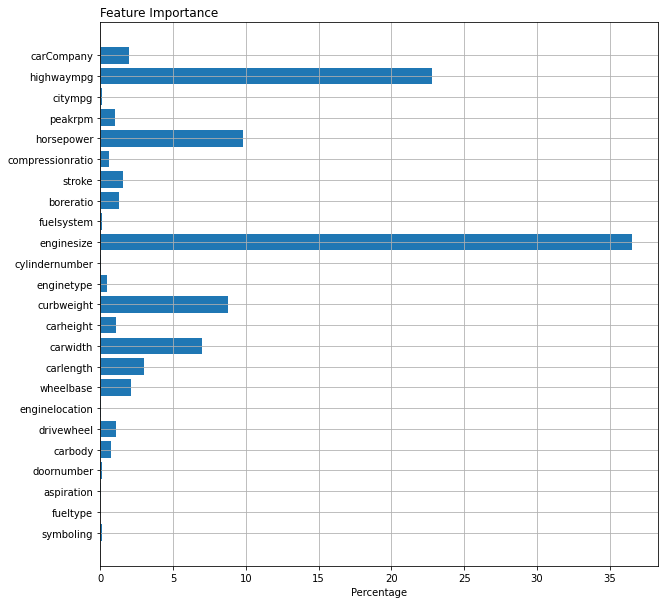

In [38]:
# plotting feature importance
importance = GBR.feature_importances_
fig = plt.figure(figsize=(10, 10))
x = X_test.columns.values
plt.barh(x, 100*importance)
plt.title('Feature Importance', loc='left')
plt.xlabel('Percentage')
plt.grid()
plt.show()

## XGboost

In [39]:
# fitting XGB on training data
XGB = XGBRegressor()
XGB = XGB.fit(X_train,y_train)

In [40]:
# predicting on test data
Y_pred = XGB.predict(X_test)

In [41]:
np.sqrt(mean_squared_log_error(y_test,Y_pred))

0.1376418483052374

In [42]:
# checking the goodness of the model
metrics.r2_score(y_test, Y_pred)

0.9072164274703658

In [43]:
importance = XGB.feature_importances_

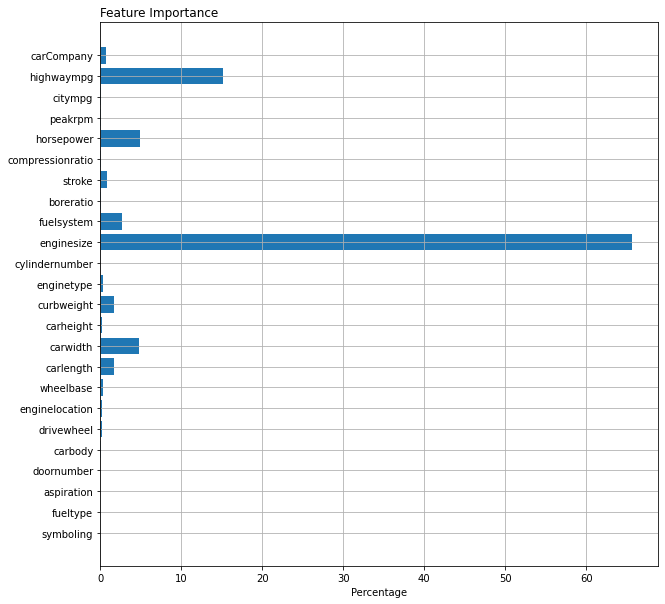

In [44]:
# plotting feature importance
fig = plt.figure(figsize=(10, 10))
x = X_train.columns.values
plt.barh(x, 100*importance)
plt.title('Feature Importance', loc='left')
plt.xlabel('Percentage')
plt.grid()
plt.show()

### Hyperparameter tuning 

In [45]:
# hyper parameter tuning for XGB
XGB = XGBRegressor()


param_grid = {"learning_rate": np.linspace(0.05, 0.15,5),
               "subsample": [0.3, 0.6, 0.9]}

rand = RandomizedSearchCV(XGB, param_grid, cv=5,n_iter=10, random_state=100)
rand.fit(X_train,y_train)

print(rand.best_params_)

{'subsample': 0.6, 'learning_rate': 0.05}


In [46]:
xgb = XGBRegressor(learning_rate= 0.15, subsample= 0.6)
xgb.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.15, subsample=0.6)

In [47]:
Y_pred = xgb.predict(X_test)

In [48]:
np.sqrt(mean_squared_log_error(y_test,Y_pred))

0.13438165581974387

In [49]:
# checking the goodness of the model
metrics.r2_score(y_test, Y_pred)

0.9256850176557331

In [50]:
importance = xgb.feature_importances_

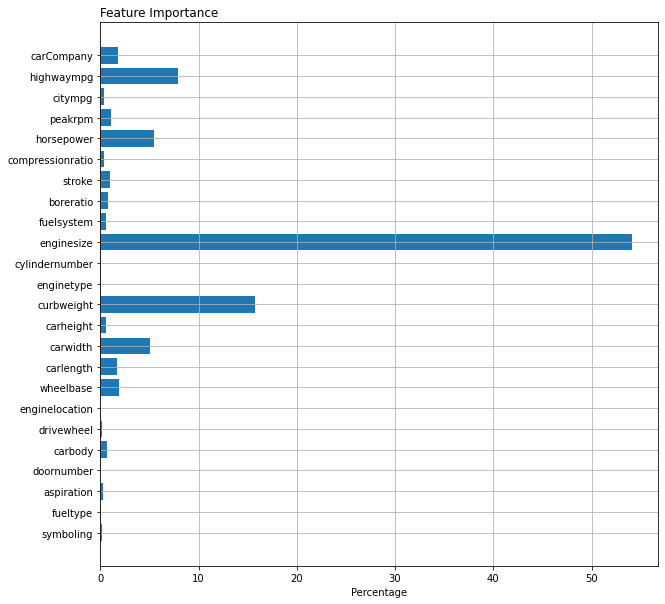

In [51]:
# plotting feature importance
fig = plt.figure(figsize=(10, 10))
x = X_test.columns.values
plt.barh(x, 100*importance)
plt.title('Feature Importance', loc='left')
plt.xlabel('Percentage')
plt.grid()
plt.show()